In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("D:/Учёба/Магистр/1_Sem/Data Analysis/heart.csv",sep=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 6 to 163
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
corr = df.corr()

np.fill_diagonal(corr.values, 0)

corr.replace(0, np.nan, inplace=True)

corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,NaN,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,NaN,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,NaN,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,NaN,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,NaN,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,NaN,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,NaN,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,NaN,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,NaN,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,NaN,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

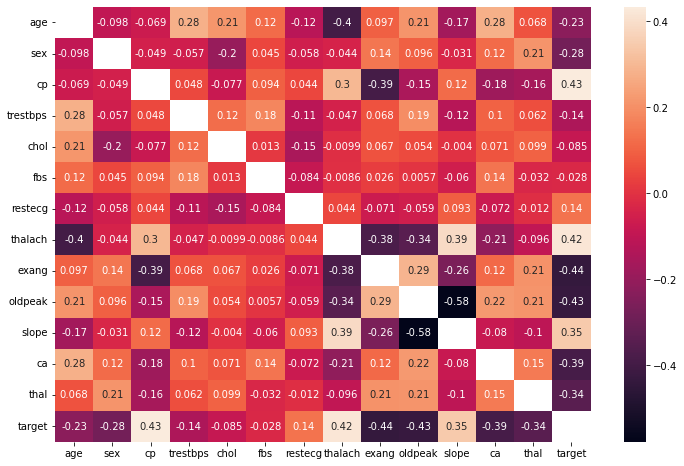

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True)

In [11]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='first')

age      age             NaN
oldpeak  slope     -0.577537
target   exang     -0.436757
         oldpeak   -0.430696
thalach  age       -0.398522
                      ...   
cp       thalach    0.295762
target   slope      0.345877
thalach  slope      0.386784
target   thalach    0.421741
cp       target     0.433798
Length: 92, dtype: float64

In [13]:
df.corr().abs()['target'].sort_values(ascending = False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

In [14]:
df = df.drop('chol', axis=1)
df = df.drop('fbs', axis=1)

In [15]:
df.shape

(303, 12)

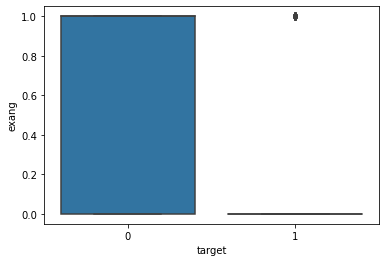

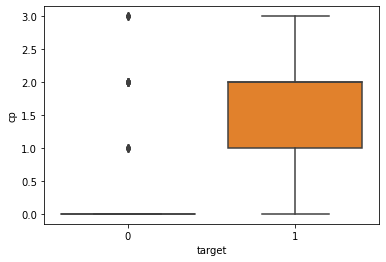

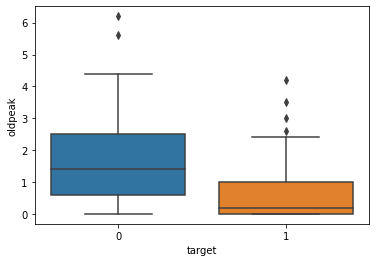

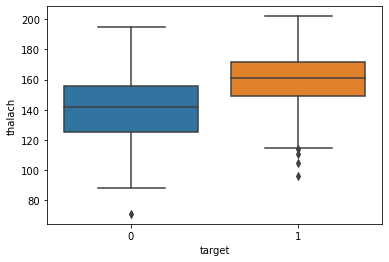

In [16]:
continuousColumns = ["exang","cp", "oldpeak", "thalach"]
for item  in continuousColumns:
    sns.boxplot(x="target", y=item, data=df)
    plt.show()

<AxesSubplot:title={'center':'thalach'}, xlabel='thalach', ylabel='Count'>

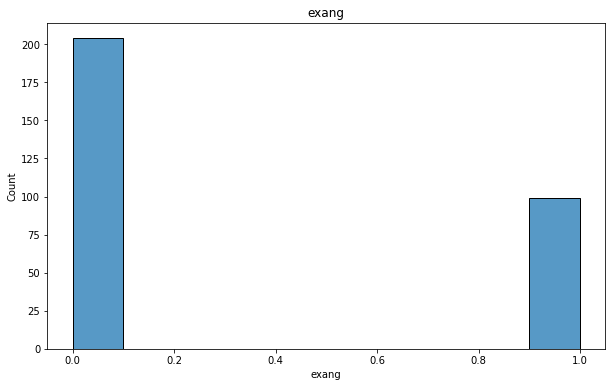

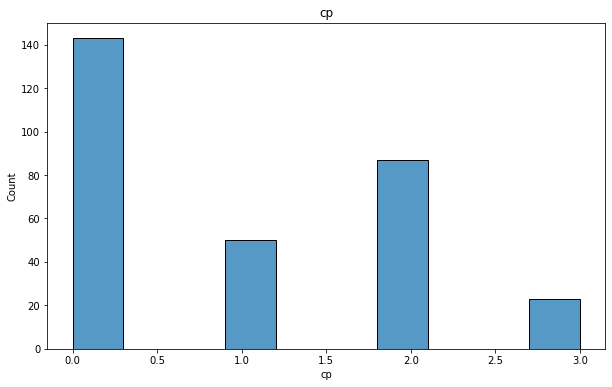

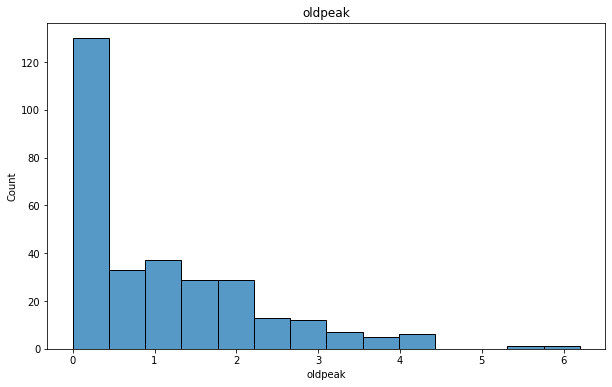

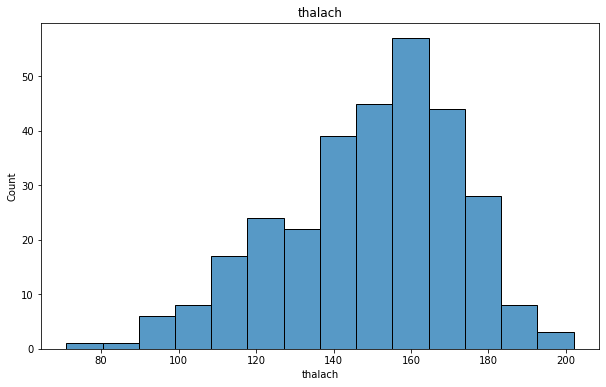

In [17]:
plt.figure(2, figsize=(10,6))
plt.title("exang")
sns.histplot(df['exang'])

plt.figure(3, figsize=(10,6)) 
plt.title("cp")
sns.histplot(df['cp'])

plt.figure(4, figsize=(10,6))
plt.title("oldpeak")
sns.histplot(df['oldpeak'])

plt.figure(5, figsize=(10,6)) 
plt.title("thalach")
sns.histplot(df['thalach'])

In [18]:
trgt = ["target"]
dfprep = df.columns.drop(trgt)
train,test = train_test_split(df,test_size = 0.33,random_state= 12)
xTrain = train[dfprep]
yTrain = train[trgt]
xTest  = test[dfprep]
yTest = test[trgt]

In [19]:
param_grid ={'n_neighbors': [3,5,7,9,11]}
knnModel = KNeighborsClassifier() 
grid_search=GridSearchCV(knnModel, param_grid,cv=5, return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [20]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.6646341463414634
The best parameters are:
 KNeighborsClassifier(n_neighbors=11)


In [21]:
knnModel = KNeighborsClassifier(n_neighbors=11) 
knnModel.fit(xTrain,yTrain.values.ravel())
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.71

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        37
           1       0.84      0.67      0.74        63

    accuracy                           0.71       100
   macro avg       0.71      0.73      0.71       100
weighted avg       0.74      0.71      0.71       100



<AxesSubplot:>

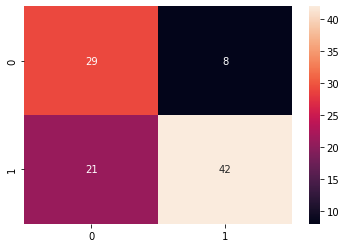

In [22]:
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [23]:
param_grid ={'max_depth': [4, 6, 8, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.013809523809523761
The best parameters are:
 DecisionTreeClassifier(max_depth=4, max_features=3)


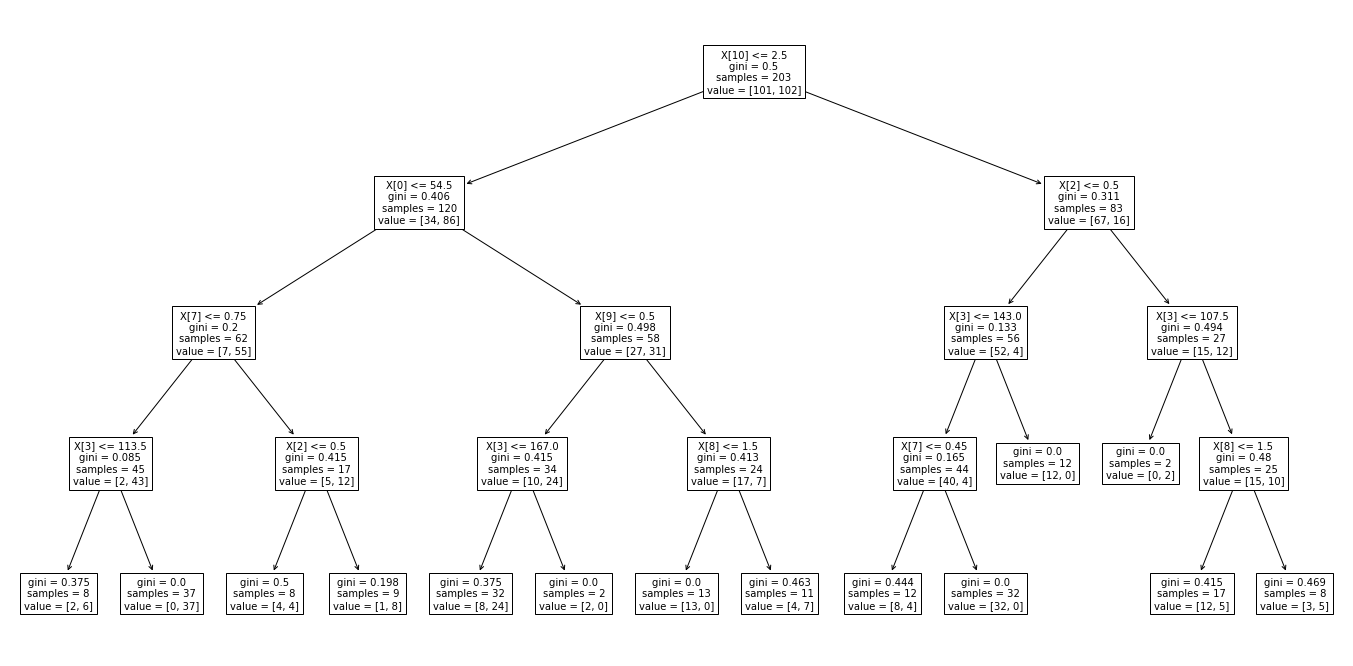

In [24]:
dTree = DecisionTreeClassifier(max_depth=4, max_features=3)
dTree.fit(xTrain, yTrain)

plt.figure(figsize=(24,12))
plot_tree(dTree, fontsize=10)
plt.show()

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        37
           1       0.89      0.81      0.85        63

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.83      0.82      0.82       100



<AxesSubplot:>

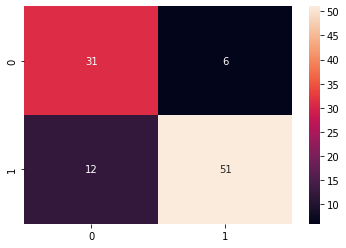

In [25]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [26]:
param_grid = {'C': [0.1, 1, 10, 25],'gamma': [0.1, 0.05, 0.03, 0.07, 0.01]}
SVC_clsfr = SVC(kernel='rbf')
grid_search = GridSearchCV(SVC_clsfr, param_grid, 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.625
The best parameters are:
 SVC(C=10, gamma=0.01)


              precision    recall  f1-score   support

           0       0.45      0.65      0.53        37
           1       0.72      0.54      0.62        63

    accuracy                           0.58       100
   macro avg       0.59      0.59      0.58       100
weighted avg       0.62      0.58      0.59       100



<AxesSubplot:>

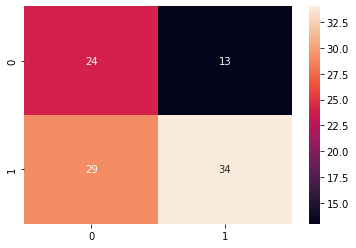

In [28]:
SVC_clsfr = SVC(kernel='rbf', C=10, gamma=0.01)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [29]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.21380952380952375
The best parameters are:
 RandomForestClassifier(max_depth=4, n_estimators=200)


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.91      0.84      0.88        63

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.86      0.85      0.85       100



<AxesSubplot:>

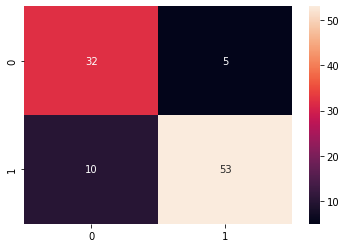

In [31]:
rForest = RandomForestClassifier(n_estimators = 200, random_state = 12, max_depth=4)
rForest.fit(xTrain,yTrain.values.ravel())

yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [32]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.25190476190476185
The best parameters are:
 AdaBoostClassifier(learning_rate=0.001, n_estimators=2000)


              precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.93      0.87      0.90        63

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.88      0.88       100



<AxesSubplot:>

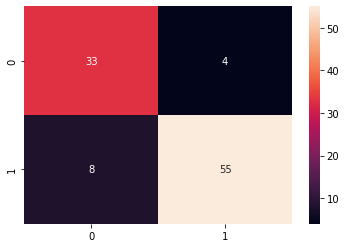

In [33]:
AdaB = AdaBoostClassifier(n_estimators=2000, learning_rate=0.001)
AdaB.fit(xTrain,yTrain.values.ravel())

yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)